# Aritificial intelligence assignment 2024

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [46]:
#plotData, plotInfo = tfds.as_numpy(tfds.load('emnist/letters', split='train', shuffle_files=True, with_info=True, batch_size=-1, as_supervised=True))

ds = tfds.as_numpy(tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    download=True,
    batch_size=-1,
    as_supervised=True,
))

(x_train, y_train), (x_test, y_test) = ds

(88800,)
(14800,)


In [48]:
# Toon de data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (88800, 28, 28, 1)
Test data shape: (14800, 28, 28, 1)


In [50]:
# Normalize the pixel values to be between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [51]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [66]:
model = Sequential()

#Maak de 28x28 array plat tot een 1 dimentionale array of een lijst
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))
model.add(Dense(27, activation='softmax'))

#Compile the current model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
# Train het model met validatie
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6064 - loss: 1.4160 - val_accuracy: 0.7901 - val_loss: 0.7030
Epoch 2/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8098 - loss: 0.6256 - val_accuracy: 0.8333 - val_loss: 0.5536
Epoch 3/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8498 - loss: 0.4872 - val_accuracy: 0.8454 - val_loss: 0.5011
Epoch 4/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8685 - loss: 0.4192 - val_accuracy: 0.8543 - val_loss: 0.4734
Epoch 5/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8821 - loss: 0.3738 - val_accuracy: 0.8587 - val_loss: 0.4461


In [70]:
# Evalueer het model op de testset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test nauwkeurigheid: {test_accuracy:.4f}")

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8525 - loss: 0.4756
Test nauwkeurigheid: 0.8495


In [72]:
# Modelgrootte berekenen
model_size = model.count_params()
model_memory = model_size * 4 / (1024 ** 2)  # 4 bytes per 32-bit float
print(f"Modelgrootte: {model_memory:.2f} MB")

Modelgrootte: 0.40 MB


In [74]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [76]:
# Maak voorspellingen op de testset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [78]:
# Bereken de verwarringsmatrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Verwarringsmatrix:")
print(cm)

Verwarringsmatrix:
[[686   6   3   5  18   1   9  13   0   1   2   0   3  13  10   4  15   3
    0   2   1   0   0   2   0   3]
 [  8 728   1  14   8   1   4  14   3   0   1   3   0   2   2   2   1   1
    1   0   0   0   0   1   0   5]
 [  7   2 705   1  55   1   4   0   1   0   2   3   0   1  10   1   1   3
    0   1   1   0   1   0   0   0]
 [  9  14   1 687   1   1   2   3   1   9   1   2   3   5  34  10   2   1
    0   5   2   0   2   0   2   3]
 [  5   6  21   0 746   2   3   0   1   0   0   2   1   0   0   2   2   3
    0   2   1   0   0   1   0   2]
 [  1   5   1   1   2 690   2   0   5   0   1   2   2   1   0  32   7  10
    4  31   0   0   0   1   2   0]
 [ 29  30  12   2   6   4 562   0   1  10   1   1   0   3   5   3 112   0
    8   3   0   0   2   0   5   1]
 [  8  16   0   4   1   3   1 652   4   0  15  18  13  47   0   0   0   1
    0   6   5   0   2   3   1   0]
 [  0   1   2   0   2   3   2   1 648  14   1 105   0   0   0   0   0   2
    2   4   0   1   1   6   1   4]


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [6]:
# Parameters
img_height, img_width = 28, 28
batch_size = 32

In [13]:
# Pad naar dataset
dataset_path = './dataset'

In [14]:
# Data generators
datagen = ImageDataGenerator(rescale=0.01, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

Found 208 images belonging to 26 classes.
Found 52 images belonging to 26 classes.


In [16]:
# Model bouwen
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [17]:
# Model trainen
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/10
7/7 [==============================] - 1s 67ms/step - loss: 3.3726 - accuracy: 0.0288 - val_loss: 3.2329 - val_accuracy: 0.0385
Epoch 2/10
7/7 [==============================] - 0s 33ms/step - loss: 3.2238 - accuracy: 0.0673 - val_loss: 3.2080 - val_accuracy: 0.0962
Epoch 3/10
7/7 [==============================] - 0s 37ms/step - loss: 3.1862 - accuracy: 0.0769 - val_loss: 3.1398 - val_accuracy: 0.2115
Epoch 4/10
7/7 [==============================] - 0s 35ms/step - loss: 3.0704 - accuracy: 0.1683 - val_loss: 3.0156 - val_accuracy: 0.3077
Epoch 5/10
7/7 [==============================] - 0s 32ms/step - loss: 2.8679 - accuracy: 0.2212 - val_loss: 2.7844 - val_accuracy: 0.3269
Epoch 6/10
7/7 [==============================] - 0s 32ms/step - loss: 2.6667 - accuracy: 0.2885 - val_loss: 2.4304 - val_accuracy: 0.6154
Epoch 7/10
7/7 [==============================] - 0s 27ms/step - loss: 2.2345 - accuracy: 0.4135 - val_loss: 1.9579 - val_accuracy: 0.6346
Epoch 8/10
7/7 [===========

In [18]:
# Model evalueren
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test nauwkeurigheid: {test_accuracy:.4f}")

2/2 [==============================] - 0s 13ms/step - loss: 0.7417 - accuracy: 0.8846
Test nauwkeurigheid: 0.8846


In [19]:
# Modelgrootte berekenen
model_size = model.count_params()
model_memory = model_size * 4 / (1024 ** 2)  # 4 bytes per 32-bit float
print(f"Modelgrootte: {model_memory:.2f} MB")

Modelgrootte: 0.87 MB


In [20]:
# Voorspellingen maken en verwarringsmatrix berekenen
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
print("Verwarringsmatrix:")
print(cm)

2/2 [==============================] - 0s 12ms/step
Verwarringsmatrix:
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0

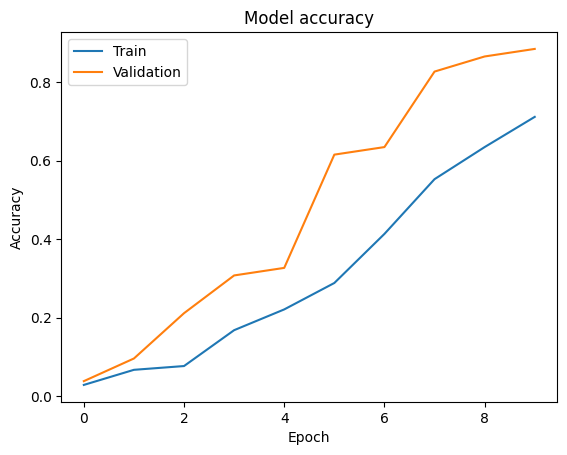

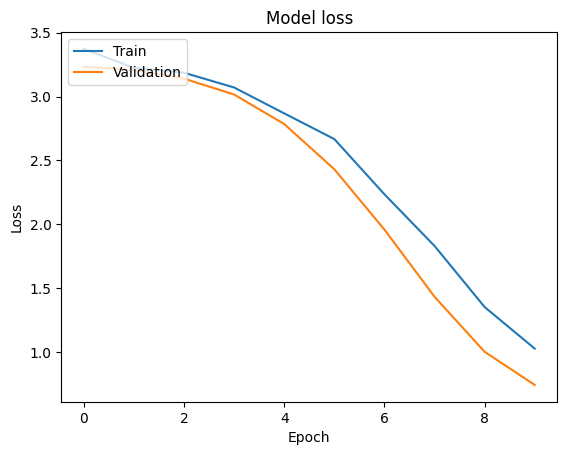

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()